Data Wrangling

In [1]:
#importing necessary libraries and packages 
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import json
import os
from PIL import Image
from io import BytesIO
from timeit import default_timer as timer

In [2]:
#importing provided file into a dataframe
df=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#gathering image prediction file from the web to my computer, writing it to a file named image_predictions.csv
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
responses=requests.get(url)
with open('image_predictions.tsv',mode='wb') as file:
    file.write(responses.content)

In [4]:
#importing the tsv file from the previous cell to a dataframe
image_pred=pd.read_csv('image_predictions.tsv',sep='\t')

In [5]:
#gathering data using twitter api
consumer_key = 'XXXXXXXXXX'
consumer_secret = 'XXXXXXXXXX'
access_token = 'XXXXXXXXXX'
access_secret = 'XXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
#public_tweets = api.home_timeline()

In [6]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file to a directory in my computer
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in df['tweet_id']:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            #create a new line for every tweet returned
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [7]:
df_tweet=[]
with open('tweet_json.txt') as tweet_file:
    for line in tweet_file:
        tweet=json.loads(line)
        time_stamp=tweet['created_at']
        favourite_count=tweet['favorite_count']
        tweet_id=tweet['id']
        text=tweet['full_text']
        #favourite_count=tweet['favourites_count']
        retweet_count=tweet['retweet_count']
    
        df_tweet.append({'time_stamp':time_stamp,'tweet_id':tweet_id,'text':text,'favourite_count':favourite_count,'retweet_count':retweet_count})
        
tweet_df=pd.DataFrame(df_tweet,columns=['time_stamp','tweet_id','text','favourite_count','retweet_count'])

Assessing

Assesing df 

In [8]:
#visual assessment of df
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
# summary of columns and non-null rows in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
#statistical summary of dataset
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
#ranking of rating by count
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
#deriving information of unique values 
df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [13]:
#random sampling 
df.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2087,670797304698376195,NaN,NaN,2015-11-29 02:51:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Trigger. He was minding his own busine...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670797304...,11,10,Trigger,None,None,None,None
1595,686358356425093120,NaN,NaN,2016-01-11 01:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene here. Son reuniting w fathe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686358356...,10,10,None,None,None,None,None
2158,669573570759163904,NaN,NaN,2015-11-25 17:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She just looked up and saw you ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669573570...,10,10,Linda,None,None,None,None
1881,675003128568291329,NaN,NaN,2015-12-10 17:24:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Laela. She's adorable. Magnificent eyes. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675003128...,12,10,Laela,None,None,None,None
437,820078625395449857,NaN,NaN,2017-01-14 01:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never wanted to go to a camp more in my e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820078625...,12,10,None,None,None,None,None
1835,676101918813499392,NaN,NaN,2015-12-13 18:10:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Striker. He's ready for Christmas. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676101918...,11,10,Striker,None,None,None,None
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most reckless puppers I've ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535...,6,10,one,None,None,None,None
642,793210959003287553,NaN,NaN,2016-10-31 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maude. She's the h*ckin happiest wasp ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793210959...,10,10,Maude,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
646,793150605191548928,NaN,NaN,2016-10-31 18:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nida. She's a free elf. Waited so long...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793150605...,11,10,Nida,None,None,None,None


In [14]:
df[df.name.str.isupper()].name.value_counts()

O     1
JD    1
Name: name, dtype: int64

In [15]:
#check if casing for name column is consistent
df[df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
not              2
actually         2
getting          2
mad              2
space            1
by               1
this             1
unacceptable     1
officially       1
light            1
infuriating      1
old              1
such             1
life             1
incredibly       1
my               1
all              1
his              1
Name: name, dtype: int64

In [16]:
df[~df.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [17]:
df.text.sample(30).sum()

"This is Louis. He's a river dancer. His friends think it's badass. All are very supportive. 10/10 for Louis https://t.co/qoIvjKMY58This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2PHere's a wicked fast pupper. 12/10 camera could barely keep pup https://t.co/HtAR6gpUAuWe only rate dogs. Please don't send in any non-canines like this Floppy Tongued House Panda. Thank you... 12/10 would still pet https://t.co/8fX2VkExnLHere we have an exotic dog. Good at ukulele. Fashionable af. Has two more arms if needed. Is blue. Knows what 'ohana means. 13/10 would pet https://t.co/gEsymGTXCTOh h*ck look at this spookling right here. Fright level off the charts. 12/10 sufficiently spooked https://t.co/BNy9IIJMb0Please enjoy this pup in a cooler. Permanently ready for someone to throw a tennis ball his way. 12/10 https://t.co/KUS0xl7XIpWas just informed about this hero pupper and others like her. Another 14/10, wou

In [18]:
tweet_df 

,time_stamp,tweet_id,text,favourite_count,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,35882,7606
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,30955,5635
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,23294,3729
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,39161,7783
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,This is Franklin. He would like you to stop ca...,37420,8385
...,...,...,...,...,...
2326,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,96,40
2327,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,269,130
2328,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,Here is a very happy pup. Big fan of well-main...,111,41
2329,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,This is a western brown Mitsubishi terrier. Up...,120,42


In [19]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time_stamp       2331 non-null   object
 1   tweet_id         2331 non-null   int64 
 2   text             2331 non-null   object
 3   favourite_count  2331 non-null   int64 
 4   retweet_count    2331 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 91.2+ KB


In [20]:
tweet_df.describe()

,tweet_id,favourite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7495.717718,2673.210639
std,6.823170e+16,11634.685551,4520.470505
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1304.500000,541.500000
50%,7.182469e+17,3259.000000,1252.000000
75%,7.986692e+17,9180.000000,3108.000000
max,8.924206e+17,154679.000000,76834.000000


In [21]:
tweet_df['tweet_id'].duplicated().sum()

0

In [22]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
image_pred['tweet_id'].duplicated().sum()

0

In [26]:
image_pred['jpg_url'].duplicated().sum()

66

In [27]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
df.retweeted_status_id.isnull().sum()

2175

# Quality issues
#### twitter archive data:
1. Incorrect datatype for time stamp Change the timestamp, retweeted_status_timestamp 
2. data entry with multiple dog_stage
3. Duplicated entries(retweets)
4. Missing values in the following columns  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
5. Entries that are not dogs eg Eyeless Porch Bear, lobsters etc
6. Source column contains html tags
7. Rating denominator contains values less than and greater than 10
8. Rating Numerator contains values that is far from median and mean
9. Name column contains lowercase values and odd names like , such, a, an, the, very, unacceptable e.t.c

#### image_prediction file:
1. duplicate data(jpg_url column)
2. Columns with  p1_dog,p2_dog contains (-_)

Tidiness:
Twitter archive data
1. The variable for the dog's stage (dogoo, floofer, pupper, puppo) is spread in different columns

#### image_df:
1. The variable for Confidence interval,prediction number and dog prediction is spread in different columns
2. This data set is part of the same observational unit as the data in the archive_df 

#### df_tweet_json:
1. This data set is also part of the same observational unit as the data in the archive_df 


# Cleaning

In [29]:
#create a copy
tweet_count_clean=tweet_df.copy()
df_clean=df.copy()
image_pred_clean=image_pred.copy()

Clean
DEFINE-CODE-TEST

1. Change the timestamp, retweeted_status_timestamp to correct datetime format for all dataset
2. Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer' and delete rows with multiple dog stage 
3. create  column for correctly predicted breed, corresponding prediction and confidence interval 
4. Delete retweets
5. Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
6. Merge the copies of the three dataframes
7. Extract names from text where possible and delete when neccessary for rows with odd and lower case names
9. Delete rows where items are not dogs
9. Delete rows with duplicated jpg.url
10. Remove HTML tags from source column
11. Standardise dog rating 
12. Removal of (-_) from dog prediction column
13. Convert the tweet_id in master_df into object type 

# define
use the inbuilt method of to_datetime to convert timestamp,retweeted_status_timestamp to datetime

## Code

In [30]:
#correct both timestamp to datetime
df_clean['time_stamp']=pd.to_datetime(df_clean['timestamp'],format='%Y-%m-%d %H:%M:%S')
df_clean['retweeted_status_timestamp']=pd.to_datetime(df_clean['retweeted_status_timestamp'],format='%Y-%m-%d %H:%M:%S')
tweet_count_clean['time_stamp']   =  pd.to_datetime(tweet_count_clean['time_stamp'])    
df_clean.drop('timestamp',axis=1,inplace=True)

# Test.
expected result for the data type is datetime64

In [31]:
df_clean['time_stamp'].dtype, df_clean['retweeted_status_timestamp'].dtype, tweet_count_clean['time_stamp'].dtype

(datetime64[ns, UTC], datetime64[ns, UTC], datetime64[ns, UTC])

##  Define
Create a columns for dog stage to one column named dog_stage by replacing  None with NaN and adding the four columns together. delete the four previous columns. delete rows having two stages

## Code

In [32]:
import numpy as np
df_clean['doggo'].replace('None','',inplace=True)
df_clean['puppo'].replace('None','',inplace=True)
df_clean['pupper'].replace('None','',inplace=True)
df_clean['floofer'].replace('None','',inplace=True)
df_clean['dog_stage']=df_clean['doggo'] + df_clean['puppo'] + df_clean['pupper'] + df_clean['floofer']
df_clean.drop(['doggo','puppo','pupper','floofer'],axis=1,inplace=True)
df_clean['dog_stage'] = df_clean['dog_stage'].astype('category')
multi_stage=df_clean.query('(dog_stage == "doggopupper") or (dog_stage=="doggopuppo") or (dog_stage=="doggofloofer")')
df_clean.drop(multi_stage.index,inplace=True)

# test
New column named dog_stage should be in the dataset and the four columns [doggo, puppo,pupper,floofer]  should be absent


In [33]:
#test
df_clean.info(),df_clean.dog_stage.value_counts()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2342 non-null   int64              
 1   in_reply_to_status_id       77 non-null     float64            
 2   in_reply_to_user_id         77 non-null     float64            
 3   source                      2342 non-null   object             
 4   text                        2342 non-null   object             
 5   retweeted_status_id         179 non-null    float64            
 6   retweeted_status_user_id    179 non-null    float64            
 7   retweeted_status_timestamp  179 non-null    datetime64[ns, UTC]
 8   expanded_urls               2283 non-null   object             
 9   rating_numerator            2342 non-null   int64              
 10  rating_denominator          2342 non-null   int64           

(None,
                 1976
 pupper           245
 doggo             83
 puppo             29
 floofer            9
 doggopuppo         0
 doggopupper        0
 doggofloofer       0
 Name: dog_stage, dtype: int64)

### DEFINE
Create  columns for dog prediction, confidence interval and number of prediction, based on the true statement in  'p1_dog', 'p2_dog' and 'p3_dog' statements and the fact that p1_conf>p2_conf>p3_conf
### CODE


In [34]:
#dog_pred column will have values in p1 as long p1 is a dog breed, else it goes to the next p2 with the next best confidence interval and checks 
#for if the predictions is a dog breed, if not it checks column p3_dog if it is a dog breed. if all predictions are not dog breed the value
# in the dog pred column will be null. the same goes for the conf_int and pred number column
image_pred_clean['dog_pred']=[image_pred_clean['p1'] if image_pred_clean.p1_dog==True 
                      else image_pred_clean['p2'] if image_pred_clean.p2_dog == True 
                      else image_pred_clean['p3'] if image_pred_clean.p3_dog == True 
                      else np.nan   for index, image_pred_clean in image_pred_clean.iterrows()]
image_pred_clean['conf_int']=[image_pred_clean['p1_conf'] if image_pred_clean.p1_dog==True 
                      else image_pred_clean['p2_conf'] if image_pred_clean.p2_dog == True 
                      else image_pred_clean['p3_conf'] if image_pred_clean.p3_dog == True 
                      else np.nan  for index, image_pred_clean in image_pred_clean.iterrows()]
image_pred_clean['pred_num']=['p1' if image_pred_clean.p1_dog==True 
                      else 'p2' if image_pred_clean.p2_dog == True 
                      else 'p3' if image_pred_clean.p3_dog == True 
                      else np.nan   for index, image_pred_clean in image_pred_clean.iterrows()]

In [35]:
#deletion of the  multiple columns that can be represented by one column
image_pred_clean=image_pred_clean.drop(['p1','p2','p3','p1_dog','p2_dog','p3_dog','p1_conf','p2_conf','p3_conf'],axis=1)

## Test
Expected outcome:there will be new new columns and the following columns will be be absent 'p1','p2','p3','p1_dog','p2_dog','p3_dog','p1_conf','p2_conf','p3_conf'

In [36]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   dog_pred  1751 non-null   object 
 4   conf_int  1751 non-null   float64
 5   pred_num  1751 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 97.4+ KB


## Define
Remove duplicated jpg_url
## Code

In [37]:
image_pred_clean=image_pred_clean.drop(image_pred_clean[image_pred_clean.jpg_url.duplicated()].index)

## Test
expected sum of zero

In [38]:
image_pred_clean.jpg_url.duplicated().sum()

0

## Define
Deletion of retweet  using conditional selection. 
## Code

In [39]:
#dropping duplicates
df_clean=df_clean[df_clean.retweeted_status_id.isnull() | df_clean.in_reply_to_status_id.isnull()]

## Test
retweeted_status_id column  & in_reply_to_status_id should have 0 non null values

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2342 non-null   int64              
 1   in_reply_to_status_id       77 non-null     float64            
 2   in_reply_to_user_id         77 non-null     float64            
 3   source                      2342 non-null   object             
 4   text                        2342 non-null   object             
 5   retweeted_status_id         179 non-null    float64            
 6   retweeted_status_user_id    179 non-null    float64            
 7   retweeted_status_timestamp  179 non-null    datetime64[ns, UTC]
 8   expanded_urls               2283 non-null   object             
 9   rating_numerator            2342 non-null   int64              
 10  rating_denominator          2342 non-null   int64           

## Define:
merge the three dataset into one dataset 

In [41]:
complete_df=pd.merge(df_clean,tweet_count_clean,on=['tweet_id','time_stamp','text'],how='left')

In [42]:
complete_df=pd.merge(image_pred_clean,complete_df,on=['tweet_id'],how='left')

In [43]:
complete_df

,tweet_id,jpg_url,img_num,dog_pred,conf_int,pred_num,in_reply_to_status_id,in_reply_to_user_id,source,text,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,time_stamp,dog_stage,favourite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,p1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,...,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,None,2015-11-15 22:32:08+00:00,,2390.0,459.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,p1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,...,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,2015-11-15 23:05:30+00:00,,120.0,42.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,p1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,...,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,2015-11-15 23:21:54+00:00,,111.0,41.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,p1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,...,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,2015-11-16 00:04:52+00:00,,269.0,130.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,p1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,...,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,2015-11-16 00:24:50+00:00,,96.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,p1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,...,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,2017-07-29 16:00:24+00:00,,37420.0,8385.0
2005,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,p2,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,...,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,2017-07-30 15:58:51+00:00,,39161.0,7783.0
2006,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,p1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,...,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,2017-07-31 00:18:03+00:00,,23294.0,3729.0
2007,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,p1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,...,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,2017-08-01 00:17:27+00:00,,30955.0,5635.0


In [44]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2009 non-null   int64              
 1   jpg_url                     2009 non-null   object             
 2   img_num                     2009 non-null   int64              
 3   dog_pred                    1691 non-null   object             
 4   conf_int                    1691 non-null   float64            
 5   pred_num                    1691 non-null   object             
 6   in_reply_to_status_id       22 non-null     float64            
 7   in_reply_to_user_id         22 non-null     float64            
 8   source                      1998 non-null   object             
 9   text                        1998 non-null   object             
 10  retweeted_status_id         15 non-null     float64         

## Define:
Deleting columns without non-null values using the inbuilt drop function
## Code

In [45]:
complete_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

## Test
The deleted columns should not be found in list of columns

In [46]:
complete_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_pred', 'conf_int', 'pred_num',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'time_stamp', 'dog_stage',
       'favourite_count', 'retweet_count'],
      dtype='object')

## Define
removing html tag from soucr column by splitting on '"' and equating the source column to a slice of split

In [47]:
#complete_df.source.head()
complete_df.source=complete_df.source.str.split('"',expand=True)[1]

## Test

In [48]:
#test
complete_df.source.head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

# Define 
correct ratings(denominator and numerator)
1. Extract denominator and numerator from text column
2. Check for denominator less than 10, get the correct values from the sum of text
3. assign the correct value 

In [49]:
# extracting probable rating from the text column 
complete_df.rating_denominator = complete_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[1]
complete_df.rating_numerator = complete_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[0]
complete_df.rating_denominator=complete_df.rating_denominator.astype('float64')
complete_df.rating_numerator=complete_df.rating_numerator.astype('float64')


In [50]:
complete_df[complete_df.rating_denominator <10]

,tweet_id,jpg_url,img_num,dog_pred,conf_int,pred_num,source,text,expanded_urls,rating_numerator,rating_denominator,name,time_stamp,dog_stage,favourite_count,retweet_count
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,p1,http://twitter.com/download/iphone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2.0,an,2015-11-16 16:11:11+00:00,,135.0,60.0
1614,810984652412424192,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,p1,http://twitter.com/download/iphone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,2016-12-19 23:06:23+00:00,,5391.0,1453.0


In [51]:
# visually check text column for correct value
complete_df[complete_df.rating_denominator < 10].text.sum()

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLvMeet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [52]:
# assign correct value to row by indexing 
complete_df.loc[1614,'rating_numerator']=np.nan
complete_df.loc[20,'rating_numerator']=9
complete_df['rating_denominator']=[10 if i < 10 else i for i in complete_df['rating_denominator']]


In [53]:
# check for denominator values greater than 10
complete_df[complete_df.rating_denominator >10]

,tweet_id,jpg_url,img_num,dog_pred,conf_int,pred_num,source,text,expanded_urls,rating_numerator,rating_denominator,name,time_stamp,dog_stage,favourite_count,retweet_count
501,675853064436391936,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,Labrador_retriever,0.868367,p1,http://twitter.com/download/iphone,Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,88.0,80.0,None,2015-12-13 01:41:41+00:00,,2606.0,1248.0
560,677716515794329600,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,chow,0.025438,p3,http://twitter.com/download/iphone,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144.0,120.0,None,2015-12-18 05:06:23+00:00,,2989.0,955.0
667,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,Chihuahua,0.155207,p2,http://twitter.com/download/iphone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7.0,11.0,Darrel,2016-01-01 16:30:13+00:00,,36297.0,16258.0
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,p1,http://twitter.com/download/iphone,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121.0,110.0,None,2016-01-05 04:00:18+00:00,,3773.0,1348.0
693,684225744407494656,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2,golden_retriever,0.203249,p1,http://twitter.com/download/iphone,"Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143.0,130.0,None,2016-01-05 04:11:44+00:00,,1213.0,203.0
865,697463031882764288,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,0.999885,p1,http://twitter.com/download/iphone,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44.0,40.0,None,2016-02-10 16:51:59+00:00,,3375.0,1381.0
941,704054845121142784,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,p1,http://twitter.com/download/iphone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,50.0,a,2016-02-28 21:25:30+00:00,,2885.0,903.0
1007,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,p1,http://twitter.com/download/iphone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,50.0,None,2016-03-14 02:04:08+00:00,,2399.0,634.0
1025,710658690886586372,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,p1,http://twitter.com/download/iphone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80.0,None,2016-03-18 02:46:49+00:00,,2270.0,550.0
1050,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,p1,http://twitter.com/download/iphone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99.0,90.0,None,2016-03-27 01:29:02+00:00,,2790.0,729.0


In [54]:
# visually obtain correct info from the sum of text for rows where the denominator is not an even number
complete_df.loc[667,'text'],complete_df.loc[1196,'text']

('This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ')

In [55]:
# assign correct value to row by indexing 
complete_df['rating_denominator'].loc[667]=10
complete_df['rating_numerator'].loc[667]=10
complete_df['rating_denominator'].loc[1196]=10
complete_df['rating_numerator'].loc[1196]=14
complete_df['rating_numerator'].loc[1105]=13
complete_df['rating_denominator'].loc[1105]=10

C:\Users\mofol\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [56]:
# create a dataset for denominator greater than 10
irregular_denom=complete_df[complete_df.rating_denominator >10]
irregular_denom
#observation. they belong to rows with multiple dogs

,tweet_id,jpg_url,img_num,dog_pred,conf_int,pred_num,source,text,expanded_urls,rating_numerator,rating_denominator,name,time_stamp,dog_stage,favourite_count,retweet_count
501,675853064436391936,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,Labrador_retriever,0.868367,p1,http://twitter.com/download/iphone,Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,88.0,80.0,None,2015-12-13 01:41:41+00:00,,2606.0,1248.0
560,677716515794329600,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,chow,0.025438,p3,http://twitter.com/download/iphone,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144.0,120.0,None,2015-12-18 05:06:23+00:00,,2989.0,955.0
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,p1,http://twitter.com/download/iphone,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121.0,110.0,None,2016-01-05 04:00:18+00:00,,3773.0,1348.0
693,684225744407494656,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2,golden_retriever,0.203249,p1,http://twitter.com/download/iphone,"Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143.0,130.0,None,2016-01-05 04:11:44+00:00,,1213.0,203.0
865,697463031882764288,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,0.999885,p1,http://twitter.com/download/iphone,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44.0,40.0,None,2016-02-10 16:51:59+00:00,,3375.0,1381.0
941,704054845121142784,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,p1,http://twitter.com/download/iphone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,50.0,a,2016-02-28 21:25:30+00:00,,2885.0,903.0
1007,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,p1,http://twitter.com/download/iphone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,50.0,None,2016-03-14 02:04:08+00:00,,2399.0,634.0
1025,710658690886586372,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,p1,http://twitter.com/download/iphone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80.0,None,2016-03-18 02:46:49+00:00,,2270.0,550.0
1050,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,p1,http://twitter.com/download/iphone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99.0,90.0,None,2016-03-27 01:29:02+00:00,,2790.0,729.0
1071,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,p1,http://twitter.com/download/iphone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50.0,Bluebert,2016-04-03 01:36:11+00:00,,2340.0,205.0


In [57]:
for i in irregular_denom['rating_denominator']:
    # assign output to the dividend of numerator divided by the denominator
        output=irregular_denom['rating_denominator']/10
        # the new numerator becomes the dividend of thedenominator and output obtained previously
        irregular_denom['rating_numerator']=irregular_denom['rating_numerator']/output
        # assign the value 10 to all values in the denominator column
        irregular_denom['rating_denominator']=10
        

C:\Users\mofol\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\mofol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [58]:
#merge the two dataset together
complete_df=pd.merge(complete_df[complete_df.rating_denominator==10],irregular_denom,on=list(complete_df.columns),how='left')
complete_df=complete_df.drop(complete_df[complete_df.rating_numerator > 20].index)

## Test
Denominator should only contain a single variable 10, numerator should have values less than 20

In [59]:
complete_df.rating_denominator.unique()

array([10.])

In [60]:
complete_df.rating_numerator.value_counts()


12.00    450
10.00    421
11.00    395
13.00    263
9.00     151
8.00      95
7.00      51
14.00     38
6.00      32
5.00      32
3.00      19
4.00      15
2.00       9
1.00       4
0.00       2
11.26      1
9.75       1
15.00      1
13.50      1
11.27      1
Name: rating_numerator, dtype: int64

## Define
Extract pr0bable names from text column for names that are in lower case and seem odd using named as a keyword

In [61]:
#create a dataset for extracted names in text column
extract=complete_df[(complete_df.name.str.islower())|(complete_df.name=='None')].text.str.extract(r'named?s?\s?[a-z\s]+?([A-Z][A-Za-z\s]+)\s?')
# assign a new name for the non_null values in the extract datset
new_names=extract[~extract[0].isnull()]


In [62]:
new_names

,0
41,Johm
44,Octaviath
49,Cupit and Prencer
51,Pepe
67,Daryl
81,Kohl
85,Tickles
87,Big Jumpy Rat
90,Klint
99,Jessiga


In [63]:
# assign the names in the new_name dataset to the correct row in the complete_df dataset
for i in new_names.index:
    complete_df.name.loc[i]=new_names.loc[i][0]

C:\Users\mofol\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [64]:

complete_df[(complete_df.name.str.islower())|(complete_df.name=='None')]

,tweet_id,jpg_url,img_num,dog_pred,conf_int,pred_num,source,text,expanded_urls,rating_numerator,rating_denominator,name,time_stamp,dog_stage,favourite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,p1,http://twitter.com/download/iphone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,None,2015-11-15 22:32:08+00:00,,2390.0,459.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,p1,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,2015-11-15 23:05:30+00:00,,120.0,42.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,p1,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,2015-11-15 23:21:54+00:00,,111.0,41.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,p1,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,2015-11-16 00:04:52+00:00,,269.0,130.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,p1,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,2015-11-16 00:24:50+00:00,,96.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,887343217045368832,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,0.330741,p1,http://twitter.com/download/iphone,You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13.0,10.0,None,2017-07-18 16:08:03+00:00,,31305.0,9455.0
1963,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,NaN,NaN,NaN,http://twitter.com/download/iphone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14.0,10.0,such,2017-07-19 03:39:09+00:00,,43133.0,10618.0
1972,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,p1,http://twitter.com/download/iphone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,None,2017-07-25 01:55:32+00:00,puppo,44670.0,9007.0
1977,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,p1,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,2017-07-28 00:22:40+00:00,,60452.0,17001.0


In [65]:
#create a list for the remaining lower case words
lowercase = complete_df[complete_df.name.str.islower()].name.unique()
# replace names with lowercase and name with null with null
complete_df.name=complete_df.name.replace(['None','Dog God'], np.nan)
complete_df.name=complete_df.name.replace(lowercase, np.nan)
complete_df.name=complete_df.name.str.replace(r'and she',' ')

## Test
 the code complete_df[(complete_df.name.str.islower())|(complete_df.name=='None')] should return an empty dataset

In [66]:
complete_df[(complete_df.name.str.islower())|(complete_df.name=='None')]

,tweet_id,jpg_url,img_num,dog_pred,conf_int,pred_num,source,text,expanded_urls,rating_numerator,rating_denominator,name,time_stamp,dog_stage,favourite_count,retweet_count


## Define: 
delete rows that are not dogs by
1. extract from text the word 'we only rate dogs', which is synonymous to entries that are not dogs
2. delete rows where both name and dog_pred are null. assumption is those rows are likely not dogs

## Code

In [67]:
#extracting the word 'we only rate dogs' and deleting rows for which the word exist
not_dog=complete_df['text'].str.extract('(We\.? [oO]nly\.? [rR]ate\.? [dD]ogs\.?)')
not_dog=not_dog[~not_dog[0].isnull()]
complete_df=complete_df.drop(not_dog.index)

In [68]:
# create a dataset where names and dog pred column is null and dropping the rows that fulfills this condition in the main dataset
nullpred_null_names=complete_df[complete_df.name.isnull() & complete_df.dog_pred.isnull()]
complete_df=complete_df.drop(nullpred_null_names.index)

## Test
The code below should return an empty dataset and the not_dog file should contain 0 non null values

In [69]:
complete_df[complete_df.name.isnull() & complete_df.dog_pred.isnull()]

,tweet_id,jpg_url,img_num,dog_pred,conf_int,pred_num,source,text,expanded_urls,rating_numerator,rating_denominator,name,time_stamp,dog_stage,favourite_count,retweet_count


In [70]:
not_dog=complete_df['text'].str.extract('(We\.? [oO]nly\.? [rR]ate\.? [dD]ogs\.?)')
not_dog.sum()

0    0.0
dtype: float64

## Define
Convert the tweet_id to a  string

## Code

In [71]:
complete_df.tweet_id=complete_df.tweet_id.astype(str)

## Test
new dtype should be object

In [72]:
complete_df.tweet_id.dtype

dtype('O')

## Define
Removal of '_-' from dog pred column using the inbuilt method replace and regex 

## Code

In [73]:
complete_df.dog_pred=complete_df.dog_pred.str.replace(r'[_-]+',' ')

## Test
the sum of rows that contains the value '-' should be zero

In [74]:
complete_df.dog_pred.str.contains('-').sum()

0

In [75]:
complete_df.dog_pred

0       Welsh springer spaniel
1                      redbone
2              German shepherd
3          Rhodesian ridgeback
4           miniature pinscher
                 ...          
1980                    basset
1981        Labrador retriever
1982                 Chihuahua
1983                 Chihuahua
1984                       NaN
Name: dog_pred, Length: 1788, dtype: object

## Storing, Analyzing, and Visualizing Data

In [114]:
#storing the merged and cleaned dataset to a csv file
complete_df.to_csv('twitter_archive_master.csv',index=False)

Insights:
1. ranking of score rating
2. most common predicted breed
3. most common dog_name

In [115]:
complete_df=pd.read_csv('twitter_archive_master.csv')

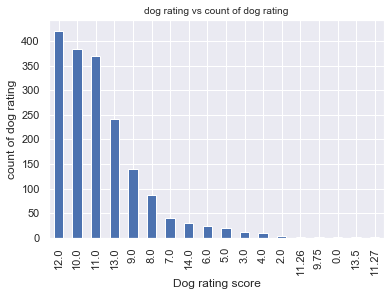

In [116]:
complete_df.rating_numerator.value_counts().plot(kind='bar')
plt.ylabel('count of dog rating')
plt.title('dog rating vs count of dog rating', size=10)
plt.xlabel('Dog rating score')
sns.set()
plt.savefig('dogscore.png')

In [112]:
# ranking of rating by frequency 
complete_df.rating_numerator.value_counts()

12.00    422
10.00    384
11.00    371
13.00    242
9.00     140
8.00      87
7.00      40
14.00     30
6.00      23
5.00      20
3.00      11
4.00       9
2.00       3
11.26      1
9.75       1
0.00       1
13.50      1
11.27      1
Name: rating_numerator, dtype: int64

In [113]:

complete_df.time_stamp.dtype

dtype('O')

What is the most common predicted breed

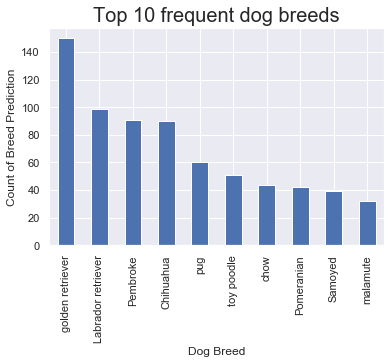

In [80]:
complete_df['dog_pred'].value_counts()[0:10].plot(kind = 'bar')
plt.ylabel('Count of Breed Prediction')
plt.title('Top 10 frequent dog breeds', size=20)
plt.xlabel('Dog Breed')
plt.savefig('dogbreed.jpg')
plt.plot();

In [81]:
complete_df['dog_pred'].value_counts()[0:10]

golden retriever      150
Labrador retriever     99
Pembroke               91
Chihuahua              90
pug                    60
toy poodle             51
chow                   44
Pomeranian             42
Samoyed                39
malamute               32
Name: dog_pred, dtype: int64

What is the most common dog_name

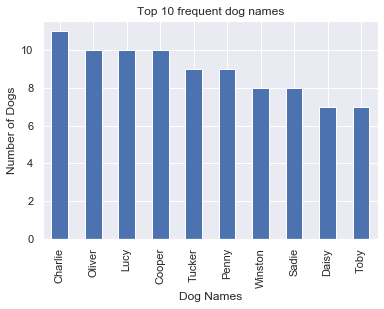

In [82]:
complete_df['name'].value_counts()[0:10].plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=12)
plt.xlabel('Dog Names')
plt.savefig('dogname.png')
plt.plot();

In [83]:
complete_df['name'].value_counts()[0:10]

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Daisy       7
Toby        7
Name: name, dtype: int64

Supplementary Insights:


In [84]:
#ranking of dog prediction by retweet
#note this is influenced by the count of dog_pred as the more the frequency the higher the probability of diverse values
complete_df.groupby('dog_pred')['retweet_count'].mean().sort_values(ascending=False)[0:20]


dog_pred
Bedlington terrier         7228.000000
standard poodle            5190.000000
Afghan hound               5158.666667
French bulldog             4974.642857
English springer           4920.555556
Saluki                     4461.250000
whippet                    4440.090909
cocker spaniel             4328.965517
Eskimo dog                 4191.590909
Irish water spaniel        3919.666667
Bouvier des Flandres       3867.000000
Samoyed                    3835.131579
Mexican hairless           3695.428571
Great Pyrenees             3636.000000
Lakeland terrier           3621.611111
Tibetan mastiff            3614.750000
black and tan coonhound    3592.000000
Leonberg                   3347.666667
Cardigan                   3287.238095
golden retriever           3232.040000
Name: retweet_count, dtype: float64

In [85]:
complete_df[complete_df.dog_pred=='standard poodle'].retweet_count

134       220.0
161        54.0
477      1526.0
777       362.0
1203      929.0
1260      784.0
1341     1083.0
1509     4320.0
1645    37063.0
1816     5559.0
Name: retweet_count, dtype: float64

In [86]:
complete_df[complete_df.dog_pred=='Bedlington terrier'].retweet_count

569     30943.0
1169     1196.0
1283     1088.0
1699     2211.0
1805     2955.0
1852     4975.0
Name: retweet_count, dtype: float64

In [87]:
#ranking of dog prediction by favourite counts
#note this is influenced by the count of dog_pred as the more the frequency the higher the probability of diverse values
complete_df.groupby('dog_pred')['favourite_count'].mean().sort_values(ascending=False)[0:20]

dog_pred
Bedlington terrier         22802.000000
Saluki                     22038.750000
French bulldog             19343.500000
Bouvier des Flandres       16329.000000
Afghan hound               15637.333333
black and tan coonhound    15533.000000
Irish water spaniel        14856.000000
standard poodle            13520.400000
Leonberg                   13471.000000
whippet                    13394.272727
English springer           12568.111111
cocker spaniel             12437.000000
Border terrier             12363.000000
Mexican hairless           12333.000000
Eskimo dog                 11775.181818
Cardigan                   11625.904762
Lakeland terrier           11309.555556
golden retriever           11252.906667
Samoyed                    11000.394737
Tibetan mastiff            10986.250000
Name: favourite_count, dtype: float64

In [88]:
#ranking of dog by rating
#note this is influenced by the count of dog_pred as the more the frequency the higher the probability of diverse values
complete_df.groupby('dog_pred')['rating_numerator'].mean()[0:20]

dog_pred
Afghan hound                       9.666667
Airedale                           9.833333
American Staffordshire terrier    10.266667
Appenzeller                       11.000000
Australian terrier                11.500000
Bedlington terrier                10.333333
Bernese mountain dog              11.272727
Blenheim spaniel                  11.272727
Border collie                     10.454545
Border terrier                    12.142857
Boston bull                        9.416667
Bouvier des Flandres              13.000000
Brabancon griffon                 10.000000
Brittany spaniel                  10.375000
Cardigan                          11.142857
Chesapeake Bay retriever          10.827586
Chihuahua                         10.533333
Dandie Dinmont                     9.500000
Doberman                          11.333333
English setter                     9.875000
Name: rating_numerator, dtype: float64

In [89]:
complete_df.dog_pred.nunique()

113

In [109]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0

## Bonus work
### import image

In [92]:
folder_name = 'twitter_dog_image'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [104]:
ranking=0
for title in complete_df['jpg_url']:
    try:
    
      # This cell is slow so print ranking to gauge time remaining
        ranking = df_list.index(title) + 1
        print(ranking)
        images = title
        r = requests.get(images)
     # Download dog image
        i = Image.open(BytesIO(r.content))
        image_file_format = first_image_url.split('.')[-1]
        i.save(folder_name + "/" + str(ranking) + "_"  + '.' + image_file_format)
    except:
        print('an error occured')
    # Not best practice to catch all exceptions but fine for this short script
   

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [106]:
#list of pictures where dog prediction or dog name was  null
df_list2=complete_df[(complete_df.dog_pred.isnull())| (complete_df.name.isnull())]

In [108]:
#random sampling of dataset where dog prediction or dog name was  null
#download and show pictures where dog prediction or dog name was  null
folder_name = 'unsure_imagers'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
ranking=0
for title in df_list2.jpg_url.sample(30):
    
      # This cell is slow so print ranking to gauge time remaining
    ranking += 1
    print(ranking)
        #tweet = api.get_status(title, tweet_mode='extended')
        # Your code here (three lines)
    images = title
        # First image is usually the poster
    first_image_url = images
    r = requests.get(first_image_url)
     # Download movie poster image
    i = Image.open(BytesIO(r.content))
    image_file_format = first_image_url.split('.')[-1]
    i.save(folder_name + "/" + str(ranking) + "_"  + '.' + image_file_format)
    i.show();
   
        # Append to list of dictionaries
        #df_list.append({'ranking': int(ranking),
                        #'title': title,
                        #'poster_url': first_image_url})
    print()

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

